Life Cycle of Machine learning Project 
- understanding problem statement 
- data collection 
- data checks to perform 
- exploratory data analysis 
- data pre-processing 
- model training 
- choose best model 

1. PROBLEM STATEMENT 


This project predicts polarity of the reviews(positive,negative or neutral) using the review text of the customers.

2. DATA COLLECTION

- dataset source - https://www.kaggle.com/datasets/nenamalikah/nlp-ulta-skincare-reviews?resource=download
- the data consist of 4150 rows and 10 columns.


2.1 Import Data and required Packages 


Importing Pandas,Numpy,Matplotlib,Seaborn Library. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

Import the csv Data as pandas Dataframe 

In [2]:
df = pd.read_csv('Data/Ulta Skincare Reviews.csv')

In [3]:
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [4]:
df.shape

(4150, 10)

2.2 Dataset Information

- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.

3. Data Checks to perform 
    - check missing values
    - check duplicates 
    - check data type
    - check number of unique values of each   colomn
    - check statistics of dataset  


3.1 Check Missing values 


In [5]:
df.isna().sum()

Review_Title        0
Review_Text         2
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

2 null values in review text and one null value in review location. 

Dealing with null value in review text - 

In [6]:
df.dropna(axis = 0, inplace = True)

In [7]:
df.isnull().sum()

Review_Title        0
Review_Text         0
Verified_Buyer      0
Review_Date         0
Review_Location     0
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

now there is no null values in the dataset. Since the dataset had only 2 values in review text that was null. Now the rows having null values is deleted. 

3.2 check duplicates

In [8]:
df.Review_Text.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4145    False
4146    False
4147    False
4148    False
4149    False
Name: Review_Text, Length: 4147, dtype: bool

No duplicate value present in the dataset.

3.3 check data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4147 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      4147 non-null   object
 1   Review_Text       4147 non-null   object
 2   Verified_Buyer    4147 non-null   object
 3   Review_Date       4147 non-null   object
 4   Review_Location   4147 non-null   object
 5   Review_Upvotes    4147 non-null   int64 
 6   Review_Downvotes  4147 non-null   int64 
 7   Product           4147 non-null   object
 8   Brand             4147 non-null   object
 9   Scrape_Date       4147 non-null   object
dtypes: int64(2), object(8)
memory usage: 356.4+ KB


3.4 check for unique values

In [10]:
df.nunique()

Review_Title        2825
Review_Text         3660
Verified_Buyer         2
Review_Date           41
Review_Location     1423
Review_Upvotes        23
Review_Downvotes      15
Product                4
Brand                  1
Scrape_Date            1
dtype: int64

out of 4170 rows , scrape date,brand and verified buyer has very less unique data that wont be useful for modelling. 

In [11]:
df.drop(['Brand','Scrape_Date'], axis=1,inplace = True)

Daily Superfoliant and Daily Microfoliant have same value counts.minimum number of reviews are of Multi-Vitamin Thermafoliant . 

In [12]:
df.drop(['Verified_Buyer','Review_Date'], axis=1,inplace = True)

In [13]:
df.head()

,Review_Title,Review_Text,Review_Location,Review_Upvotes,Review_Downvotes,Product
0,Perfect,Love using this on my face while in the shower...,Undisclosed,0,0,Multi-Vitamin Thermafoliant
1,You need this,Even better than the daily microfoliant. I'm o...,Undisclosed,0,0,Multi-Vitamin Thermafoliant
2,Clean skin,Enjoy this product so much ! I look forward to...,Undisclosed,0,0,Multi-Vitamin Thermafoliant
3,Love This Stuff!,I've never tried anything like this before and...,Undisclosed,0,0,Multi-Vitamin Thermafoliant
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,Undisclosed,0,0,Multi-Vitamin Thermafoliant


3.5 Check statistics of the dataset 

In [14]:
df.describe()

,Review_Upvotes,Review_Downvotes
count,4147.000000,4147.000000
mean,0.591271,0.161321
std,2.210694,0.912881
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,84.000000,35.000000


review_upvotes is between 0 to 84, review_downvotes is between 0 to 35. 75% of the data in column review_upvotes and review_downvotes is zero. values in review_upvotes is deviating from mean value with 2.21. review_downvotes value is deviating 0.91 from mean value .

In [15]:
df.drop(['Review_Upvotes','Review_Downvotes'], axis=1,inplace = True)

In [17]:
df.head()

,Review_Title,Review_Text,Review_Location,Product
0,Perfect,Love using this on my face while in the shower...,Undisclosed,Multi-Vitamin Thermafoliant
1,You need this,Even better than the daily microfoliant. I'm o...,Undisclosed,Multi-Vitamin Thermafoliant
2,Clean skin,Enjoy this product so much ! I look forward to...,Undisclosed,Multi-Vitamin Thermafoliant
3,Love This Stuff!,I've never tried anything like this before and...,Undisclosed,Multi-Vitamin Thermafoliant
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,Undisclosed,Multi-Vitamin Thermafoliant


3.7 Adding new columns in the dataset 

Importing libraries to work with text data 

In [18]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\achoudhary\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\achoudhary\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [19]:
df['Review_Text']

0       Love using this on my face while in the shower...
1       Even better than the daily microfoliant. I'm o...
2       Enjoy this product so much ! I look forward to...
3       I've never tried anything like this before and...
4       This exfoliates very nicely and gives a very s...
                              ...                        
4145                    Much better product than a scrub.
4146    I've been using this exfoliant for a few month...
4147          My skin looks better now than 10 years ago.
4148    This product was useless for me. I should've k...
4149    This product is amazing! It is the only thing ...
Name: Review_Text, Length: 4147, dtype: object

In [20]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\achoudhary\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [21]:
df['Review_Text'] = df['Review_Text'].astype(str)
df['Review_Text'] = df['Review_Text'].apply(lambda x: x.lower())
df['Review_Text'] = df['Review_Text'].apply(lambda x: re.sub('[^a-zA-Z0-9]',' ',x))
df['Review_Text'] = df['Review_Text'].apply(lambda x: word_tokenize(x))
print(type(df['Review_Text']))

<class 'pandas.core.series.Series'>


In [22]:
df['Review_Text'] = df['Review_Text'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])
df['Review_Text']

0       [love, using, face, shower, heats, gives, ligh...
1       [even, better, daily, microfoliant, obsessed, ...
2       [enjoy, product, much, look, forward, using, r...
3       [never, tried, anything, like, love, apply, fa...
4       [exfoliates, nicely, gives, smooth, skin, irri...
                              ...                        
4145                       [much, better, product, scrub]
4146    [using, exfoliant, months, depending, conditio...
4147                [skin, looks, better, 10, years, ago]
4148    [product, useless, known, exfoliant, use, dail...
4149    [product, amazing, thing, helps, dry, patches,...
Name: Review_Text, Length: 4147, dtype: object

In [23]:
ps=PorterStemmer()
df['Review_Text'] = df['Review_Text'].apply(lambda x: [ps.stem(y) for y in x])
df['Review_Text'] = df['Review_Text'].apply(lambda x: ' '.join(x))
df['Review_Text']

0         love use face shower heat give light scrub nice
1       even better daili microfoli obsess skin much s...
2       enjoy product much look forward use realli fee...
3       never tri anyth like love appli face get littl...
4       exfoli nice give smooth skin irrit reaction sk...
                              ...                        
4145                            much better product scrub
4146    use exfoli month depend condit skin use anywhe...
4147                         skin look better 10 year ago
4148    product useless known exfoli use daili would g...
4149    product amaz thing help dri patch cheek also c...
Name: Review_Text, Length: 4147, dtype: object

In [25]:
!pip install vaderSentiment

     -------------------------------------- 126.0/126.0 kB 1.1 MB/s eta 0:00:00


In [27]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['score'] = df['Review_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\achoudhary\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Review_Title,Review_Text,Review_Location,Product,score
0,Perfect,love use face shower heat give light scrub nice,Undisclosed,Multi-Vitamin Thermafoliant,0.7906
1,You need this,even better daili microfoli obsess skin much s...,Undisclosed,Multi-Vitamin Thermafoliant,0.2263
2,Clean skin,enjoy product much look forward use realli fee...,Undisclosed,Multi-Vitamin Thermafoliant,0.8074
3,Love This Stuff!,never tri anyth like love appli face get littl...,Undisclosed,Multi-Vitamin Thermafoliant,0.7839
4,This exfoliates very nicely and,exfoli nice give smooth skin irrit reaction sk...,Undisclosed,Multi-Vitamin Thermafoliant,0.6486


new column score added . 

In [28]:
df['sentiment'] = df['score'].apply(lambda x: 1 if x>0 else 0)
df.head()

,Review_Title,Review_Text,Review_Location,Product,score,sentiment
0,Perfect,love use face shower heat give light scrub nice,Undisclosed,Multi-Vitamin Thermafoliant,0.7906,1
1,You need this,even better daili microfoli obsess skin much s...,Undisclosed,Multi-Vitamin Thermafoliant,0.2263,1
2,Clean skin,enjoy product much look forward use realli fee...,Undisclosed,Multi-Vitamin Thermafoliant,0.8074,1
3,Love This Stuff!,never tri anyth like love appli face get littl...,Undisclosed,Multi-Vitamin Thermafoliant,0.7839,1
4,This exfoliates very nicely and,exfoli nice give smooth skin irrit reaction sk...,Undisclosed,Multi-Vitamin Thermafoliant,0.6486,1


3.6  Data Exploration (Visualization)

In [30]:
import seaborn as sns

<Axes: title={'center': 'positive - negative reviews '}>

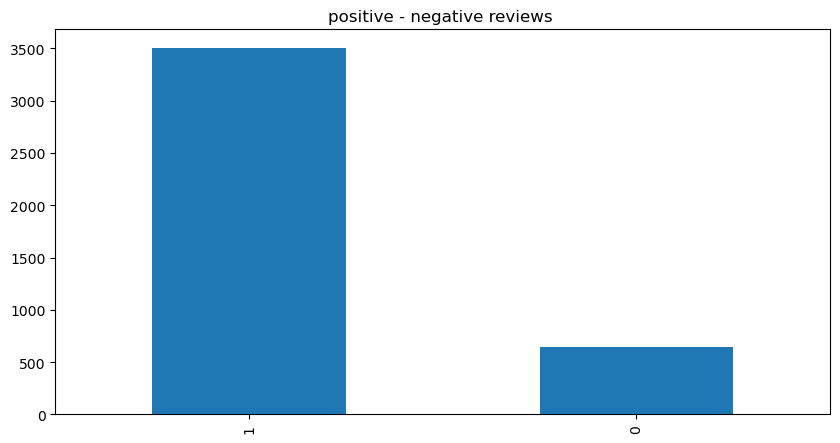

In [29]:
df['sentiment'].value_counts().plot(kind = 'bar',title = 'positive - negative reviews ',figsize = (10,5))

<Axes: title={'center': 'Count of each product'}>

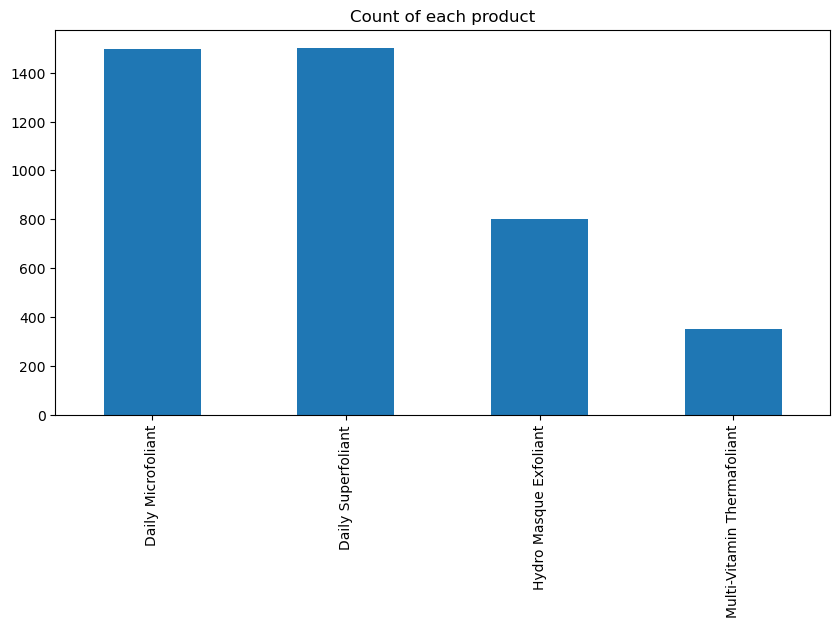

In [16]:
df['Product'].value_counts().sort_index().plot(kind = 'bar',title = 'Count of each product',figsize = (10,5))

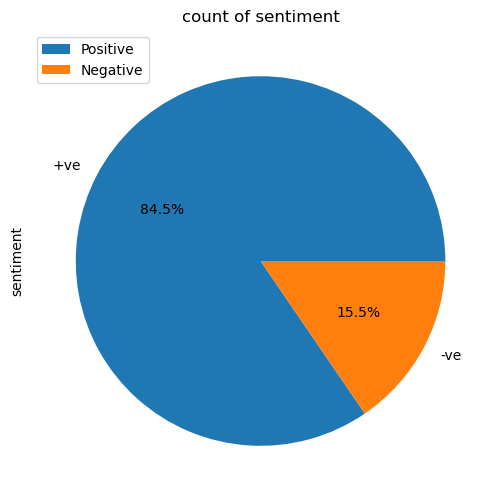

In [31]:
df['sentiment'].value_counts().plot.pie(figsize=(6,6) , title='count of sentiment' ,labels=['+ve','-ve'],autopct='%1.1f%%')
labels=["Positive","Negative"]
plt.legend(labels,loc=2)

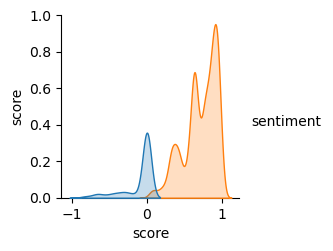

In [41]:
sns.pairplot(df,hue = 'sentiment')

<Axes: xlabel='sentiment', ylabel='score'>

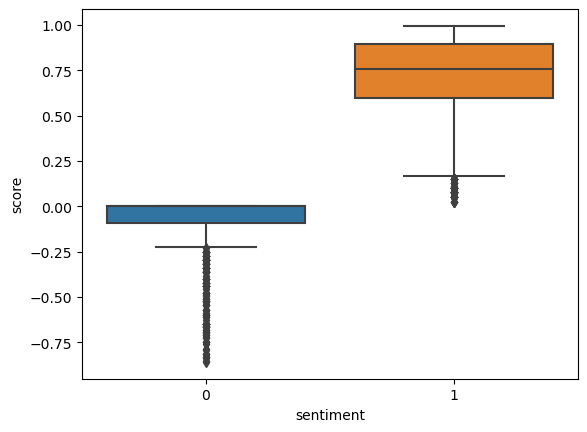

Retrieving notices: ...working... done
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed



Examining python=3.10:  75%|███████▌  | 3/4 [00:01<00:00,  1.46it/s]                   
                                                                    

Examining conflict for wordcloud python:   0%|          | 0/4 [00:00<?, ?it/s]
                                                                              

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - wordcloud=1.6.0 -> python[version='>=2.7,<2.8.0a0|>=3.8,<3.9.0a0|>=3.7,<3.8.0a0|>=3.6,<3.7.0a0']

Your python: python=3.10

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you explicitly specify
that.





In [43]:
sns.boxplot(x='sentiment',y = 'score',data = df)